## Notebook AIM: Generate More data from the original dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Questions to solve:
  - Strategy for generating more data
  - 

In [2]:
DISEASE_PRED_PATH="/content/drive/MyDrive/AIDocAssist/Disease_predictor"

In [3]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data =  pd.read_csv(DISEASE_PRED_PATH+"/Prepared_Data.csv")

In [5]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,disease
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
data.disease.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
data["disease"].value_counts()

Dengue                                     10
Migraine                                   10
Hepatitis D                                10
Chicken pox                                10
Hepatitis E                                 9
Diabetes                                    9
Hepatitis B                                 9
Typhoid                                     9
Hypoglycemia                                9
hepatitis A                                 9
Tuberculosis                                9
Jaundice                                    9
Common Cold                                 9
Hyperthyroidism                             9
Pneumonia                                   9
Hypothyroidism                              8
Varicose veins                              8
Chronic cholestasis                         8
Malaria                                     8
Alcoholic hepatitis                         8
Hepatitis C                                 7
Osteoarthristis                   

### For Fungal Infection

In [ ]:
def create_feature_heatmap(disease):
  features = data[data["disease"]==disease].drop(columns="disease")
  filtered_features = features[[column for column in features.columns if features[column].sum()>0]]
  fig, ax = plt.subplots(figsize=(20,7)) 
  sns.heatmap(filtered_features.corr(),  cmap="YlGnBu", annot=True)
  plt.show()  

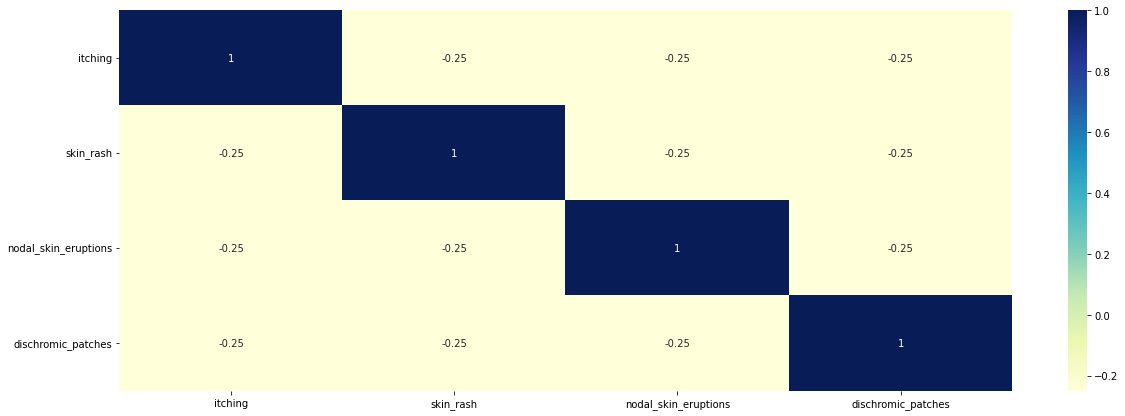

In [ ]:
create_feature_heatmap("Fungal infection")

In [ ]:
features = data[data["disease"]=="Fungal infection"].drop(columns="disease")
filtered_features = features[[column for column in features.columns if features[column].sum()>0]]
filtered_features.drop_duplicates()

,itching,skin_rash,nodal_skin_eruptions,dischromic_patches
0,1,1,1,1
1,0,1,1,1
2,1,0,1,1
3,1,1,0,1
4,1,1,1,0


#### Let's see how different features of Fungal Infection affects all the diseases

In [8]:
def find_symptom_counts_for_disease(symptom):
  symptom_table = data.groupby(["disease", symptom],as_index=False).size().pivot_table(columns=symptom, index="disease", values="size", fill_value=0)
  return symptom_table[symptom_table[1]>0]

In [ ]:
find_symptom_counts_for_disease("itching")

itching,0,1
disease,,
Chicken pox,1,9
Chronic cholestasis,1,7
Drug Reaction,1,5
Fungal infection,1,4
Hepatitis B,1,8
Jaundice,1,8


In [ ]:
find_symptom_counts_for_disease("skin_rash")

skin_rash,0,1
disease,,
Acne,1,4
Chicken pox,1,9
Dengue,1,9
Drug Reaction,1,5
Fungal infection,1,4
Impetigo,1,5
Psoriasis,1,6


In [ ]:
find_symptom_counts_for_disease("nodal_skin_eruptions")

nodal_skin_eruptions,0,1
disease,,
Fungal infection,1,4


In [ ]:
find_symptom_counts_for_disease("dischromic_patches")

dischromic_patches,0,1
disease,,
Fungal infection,1,4


#### Symptoms which can directly indicate Fungal Infection are "nodal skin eruptions" and "dischromic patches"

### For Common Cold

In [ ]:
features = data[data["disease"]=="Common Cold"].drop(columns="disease")
filtered_features = features[[column for column in features.columns if features[column].sum()>0]]
filtered_features.drop_duplicates()

,continuous_sneezing,chills,fatigue,cough,high_fever,headache,swelled_lymph_nodes,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain
198,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
199,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
200,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
201,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
202,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
203,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
204,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
205,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
206,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


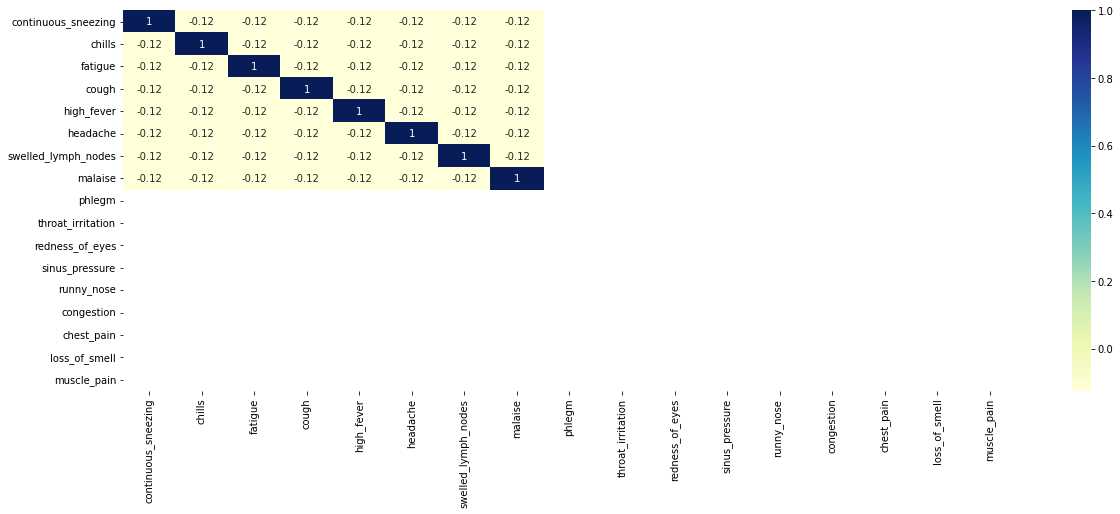

In [ ]:
create_feature_heatmap("Common Cold")

In [ ]:
find_symptom_counts_for_disease("continuous_sneezing")

continuous_sneezing,0,1
disease,,
Allergy,1,4
Common Cold,1,8


In [ ]:
find_symptom_counts_for_disease("chills")

chills,0,1
disease,,
Allergy,1,4
Common Cold,1,8
Dengue,1,9
Malaria,1,7
Pneumonia,1,8
Tuberculosis,1,8
Typhoid,0,9


In [ ]:
find_symptom_counts_for_disease("fatigue")

fatigue,0,1
disease,,
Bronchial Asthma,1,6
Chicken pox,1,9
Common Cold,1,8
Dengue,1,9
Diabetes,1,8
Hepatitis B,1,8
Hepatitis C,1,6
Hepatitis D,1,9
Hepatitis E,1,8


In [ ]:
find_symptom_counts_for_disease("cough")

cough,0,1
disease,,
Bronchial Asthma,1,6
Common Cold,1,8
GERD,1,6
Pneumonia,1,8
Tuberculosis,1,8


In [ ]:
find_symptom_counts_for_disease("high_fever")

high_fever,0,1
disease,,
AIDS,1,4
Bronchial Asthma,1,6
Chicken pox,1,9
Common Cold,1,8
Dengue,1,9
Hepatitis E,1,8
Impetigo,1,5
Jaundice,1,8
Malaria,1,7


In [ ]:
find_symptom_counts_for_disease("headache")

headache,0,1
disease,,
(vertigo) Paroymsal Positional Vertigo,1,6
Chicken pox,1,9
Common Cold,1,8
Dengue,0,10
Hypertension,1,5
Hypoglycemia,1,8
Malaria,1,7
Migraine,1,9
Paralysis (brain hemorrhage),1,4


In [ ]:
find_symptom_counts_for_disease("malaise")

malaise,0,1
disease,,
Chicken pox,0,10
Common Cold,1,8
Dengue,1,9
Hepatitis B,0,9
Pneumonia,1,8
Tuberculosis,0,9


In [ ]:
find_symptom_counts_for_disease("phlegm")

phlegm,0,1
disease,,
Common Cold,0,9
Pneumonia,1,8
Tuberculosis,0,9


In [ ]:
find_symptom_counts_for_disease("throat_irritation")

throat_irritation,0,1
disease,,
Common Cold,0,9


In [ ]:
find_symptom_counts_for_disease("redness_of_eyes")

redness_of_eyes,0,1
disease,,
Common Cold,0,9


In [ ]:
find_symptom_counts_for_disease("sinus_pressure")

sinus_pressure,0,1
disease,,
Common Cold,0,9


In [ ]:
find_symptom_counts_for_disease("runny_nose")

runny_nose,0,1
disease,,
Common Cold,0,9


In [ ]:
find_symptom_counts_for_disease("congestion")

congestion,0,1
disease,,
Common Cold,0,9


In [ ]:
find_symptom_counts_for_disease("loss_of_smell")

loss_of_smell,0,1
disease,,
Common Cold,0,9


In [ ]:
find_symptom_counts_for_disease("swelled_lymph_nodes")

swelled_lymph_nodes,0,1
disease,,
Chicken pox,1,9
Common Cold,1,8
Tuberculosis,0,9


#### Symptoms which can directly indicate Common Cold are "throat irritation", "runny nose", "redness of eyes", "sinus pressure", "congestion", "loss of smell"

### For Chronic cholestasis

In [ ]:
features = data[data["disease"]=="Chronic cholestasis"].drop(columns="disease")
filtered_features = features[[column for column in features.columns if features[column].sum()>0]]
filtered_features.drop_duplicates()

,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes
17,1,1,1,1,1,1,1
18,0,1,1,1,1,1,1
19,1,0,1,1,1,1,1
20,1,1,0,1,1,1,1
21,1,1,1,0,1,1,1
22,1,1,1,1,0,1,1
23,1,1,1,1,1,0,1
24,1,1,1,1,1,1,0


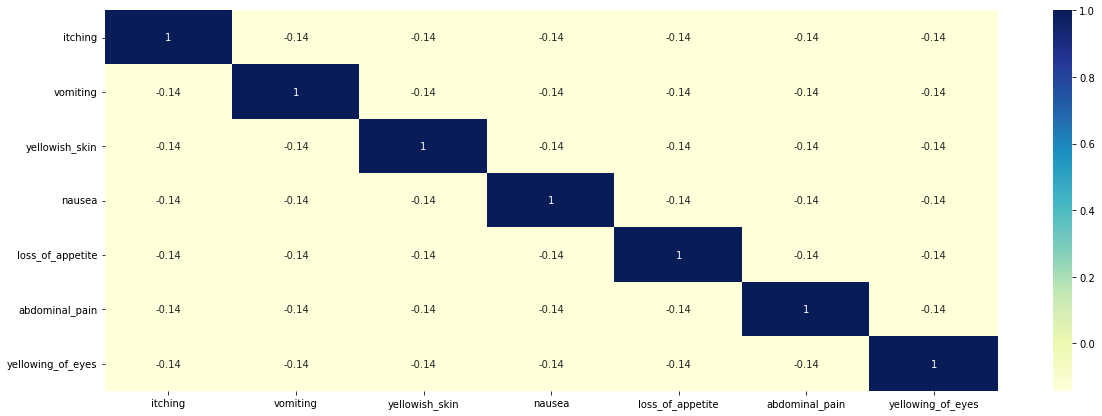

In [ ]:
create_feature_heatmap("Chronic cholestasis")

In [ ]:
find_symptom_counts_for_disease("itching")

itching,0,1
disease,,
Chicken pox,1,9
Chronic cholestasis,1,7
Drug Reaction,1,5
Fungal infection,1,4
Hepatitis B,1,8
Jaundice,1,8


In [ ]:
find_symptom_counts_for_disease("vomiting")

vomiting,0,1
disease,,
(vertigo) Paroymsal Positional Vertigo,1,6
Alcoholic hepatitis,1,7
Chronic cholestasis,1,7
Dengue,1,9
GERD,1,6
Gastroenteritis,1,4
Heart attack,1,4
Hepatitis D,1,9
Hepatitis E,1,8


In [ ]:
find_symptom_counts_for_disease("yellowish_skin")

yellowish_skin,0,1
disease,,
Alcoholic hepatitis,1,7
Chronic cholestasis,1,7
Hepatitis B,1,8
Hepatitis C,1,6
Hepatitis D,1,9
Hepatitis E,1,8
Jaundice,1,8
hepatitis A,1,8


In [ ]:
find_symptom_counts_for_disease("nausea")

nausea,0,1
disease,,
(vertigo) Paroymsal Positional Vertigo,1,6
Chronic cholestasis,1,7
Dengue,0,10
Hepatitis C,1,6
Hepatitis D,1,9
Hepatitis E,1,8
Hypoglycemia,1,8
Malaria,1,7
Typhoid,1,8


In [ ]:
find_symptom_counts_for_disease("loss_of_appetite")

loss_of_appetite,0,1
disease,,
Chicken pox,1,9
Chronic cholestasis,1,7
Dengue,0,10
Hepatitis B,1,8
Hepatitis C,1,6
Hepatitis D,1,9
Hepatitis E,0,9
Peptic ulcer diseae,1,6
Tuberculosis,0,9


In [ ]:
find_symptom_counts_for_disease("abdominal_pain")

abdominal_pain,0,1
disease,,
Alcoholic hepatitis,1,7
Chronic cholestasis,1,7
Hepatitis B,1,8
Hepatitis D,1,9
Hepatitis E,0,9
Jaundice,1,8
Peptic ulcer diseae,1,6
Typhoid,1,8
hepatitis A,1,8


In [ ]:
find_symptom_counts_for_disease("yellowing_of_eyes")

yellowing_of_eyes,0,1
disease,,
Chronic cholestasis,1,7
Hepatitis B,0,9
Hepatitis C,1,6
Hepatitis D,1,9
Hepatitis E,0,9
Tuberculosis,0,9
hepatitis A,0,9


#### No small subset of symptoms can accurately define Chronic cholestasis

### For Hypothyroidism

In [ ]:
features = data[data["disease"]=="Hypothyroidism"].drop(columns="disease")
filtered_features = features[[column for column in features.columns if features[column].sum()>0]]
filtered_features.drop_duplicates()

,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,depression,irritability,abnormal_menstruation
235,1,1,1,1,1,1,1,1,1,1,1,1,1
236,0,1,1,1,1,1,1,1,1,1,1,1,1
237,1,0,1,1,1,1,1,1,1,1,1,1,1
238,1,1,0,1,1,1,1,1,1,1,1,1,1
239,1,1,1,0,1,1,1,1,1,1,1,1,1
240,1,1,1,1,0,1,1,1,1,1,1,1,1
241,1,1,1,1,1,0,1,1,1,1,1,1,1
242,1,1,1,1,1,1,0,1,1,1,1,1,1


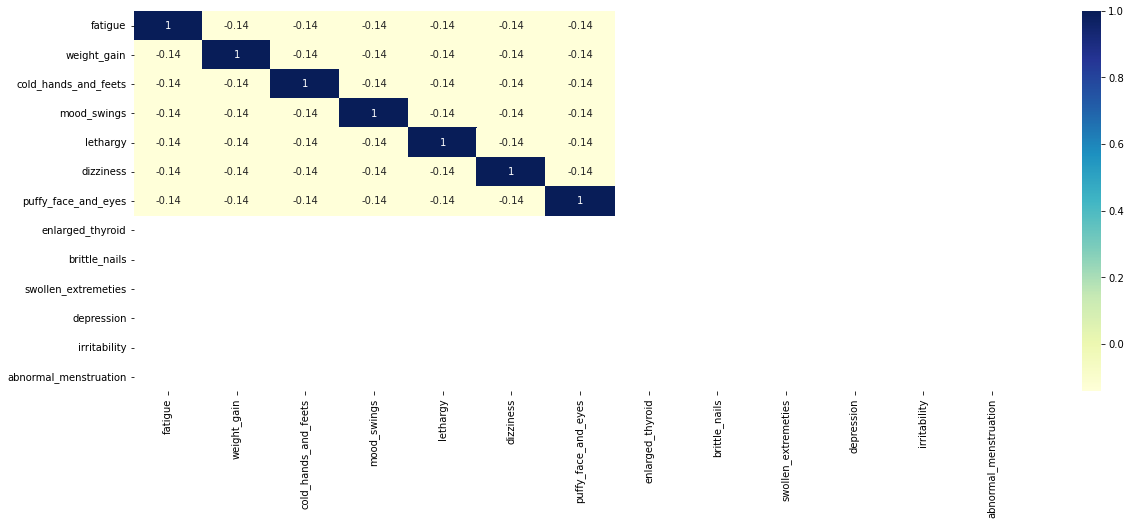

In [ ]:
create_feature_heatmap("Hypothyroidism")

In [ ]:
find_symptom_counts_for_disease("fatigue")

fatigue,0,1
disease,,
Bronchial Asthma,1,6
Chicken pox,1,9
Common Cold,1,8
Dengue,1,9
Diabetes,1,8
Hepatitis B,1,8
Hepatitis C,1,6
Hepatitis D,1,9
Hepatitis E,1,8


In [ ]:
find_symptom_counts_for_disease("enlarged_thyroid")

enlarged_thyroid,0,1
disease,,
Hypothyroidism,0,8


In [ ]:
find_symptom_counts_for_disease("irritability")

irritability,0,1
disease,,
Hyperthyroidism,0,9
Hypoglycemia,0,9
Hypothyroidism,0,8
Migraine,1,9


In [ ]:
find_symptom_counts_for_disease("brittle_nails")

brittle_nails,0,1
disease,,
Hypothyroidism,0,8


In [ ]:
find_symptom_counts_for_disease("depression")

depression,0,1
disease,,
Hypothyroidism,0,8
Migraine,1,9


In [ ]:
find_symptom_counts_for_disease("abnormal_menstruation")

abnormal_menstruation,0,1
disease,,
Hyperthyroidism,0,9
Hypothyroidism,0,8


In [ ]:
find_symptom_counts_for_disease("cold_hands_and_feets")

cold_hands_and_feets,0,1
disease,,
Hypothyroidism,1,7


In [ ]:
find_symptom_counts_for_disease("dizziness")

dizziness,0,1
disease,,
Cervical spondylosis,1,5
Hypertension,1,5
Hypothyroidism,1,7


#### "cold hands and feet", "enlarged_thyroid", "brittle nails" can indicate Hypothyroidism

### Let's see the symptoms and their indicating diseases

In [6]:
data.drop(columns="prognosis", inplace=True) # It was giving error in next step

In [9]:
diseases=pd.DataFrame(columns=["symptom","disease"])
for symptom in data.drop(columns="disease").columns:
  symp_dis =[]
  for disease in find_symptom_counts_for_disease(symptom).index.values:
    symp_dis.append([symptom, disease])
  diseases=diseases.append(pd.DataFrame(symp_dis,columns=diseases.columns))
diseases

,symptom,disease
0,itching,Chicken pox
1,itching,Chronic cholestasis
2,itching,Drug Reaction
3,itching,Fungal infection
4,itching,Hepatitis B
...,...,...
0,small_dents_in_nails,Psoriasis
0,inflammatory_nails,Psoriasis
0,blister,Impetigo
0,red_sore_around_nose,Impetigo


In [10]:
diseases.to_csv(DISEASE_PRED_PATH+"/Disease_indicator.csv", index=False)

## Data Generation
### Generation Goal:
`Minimize the number of symptoms to accurately predict the corresponding disease`

### Generation Strategy:
 `Using Disease_indicator.csv to find the most powerful symptoms for a particular disease, add all combinations for the most powerful symptoms`

 For Example,
 the most powerful symptoms for Fungal Infection are Nodal Skin Eruptions and Dischromic Patches.
 We can add some combinations of these like {`nodal skin eruptions`}, {`dischromic patches`}, {`nodal skin eruptions`, `dischromic patches`}, {`nodal skin eruptions`, `skin rash` (we can also add other less powerful symptoms)}, {`nodal skin eruptions`, `skin_rash`, `dischromic patches`}, and so on.

### Constraints:
- Maintain Class Balance
- Minimize number of symptoms to accurately predict a disease

In [11]:
data1 = pd.read_csv(DISEASE_PRED_PATH+"/Prepared_Data.csv")
data1.drop(columns="prognosis", inplace=True)

In [12]:
disease_ind = pd.read_csv(DISEASE_PRED_PATH+"/Disease_indicator.csv")

In [13]:
disease_ind

,symptom,disease
0,itching,Chicken pox
1,itching,Chronic cholestasis
2,itching,Drug Reaction
3,itching,Fungal infection
4,itching,Hepatitis B
...,...,...
316,small_dents_in_nails,Psoriasis
317,inflammatory_nails,Psoriasis
318,blister,Impetigo
319,red_sore_around_nose,Impetigo


In [ ]:
disease_ind[disease_ind["disease"]=="Fungal infection"]

,symptom,disease
3,itching,Fungal infection
10,skin_rash,Fungal infection
13,nodal_skin_eruptions,Fungal infection
290,dischromic_patches,Fungal infection


In [ ]:
disease_ind[disease_ind["symptom"]=="nodal_skin_eruptions"]

,symptom,disease
13,nodal_skin_eruptions,Fungal infection


In [ ]:
disease_ind[disease_ind["symptom"]=="itching"]

,symptom,disease
0,itching,Chicken pox
1,itching,Chronic cholestasis
2,itching,Drug Reaction
3,itching,Fungal infection
4,itching,Hepatitis B
5,itching,Jaundice


In [ ]:
disease_ind[disease_ind["symptom"]=="skin_rash"]

,symptom,disease
6,skin_rash,Acne
7,skin_rash,Chicken pox
8,skin_rash,Dengue
9,skin_rash,Drug Reaction
10,skin_rash,Fungal infection
11,skin_rash,Impetigo
12,skin_rash,Psoriasis


### Generation Algorithm:
- Find the influence of each symptom on a disease.

  For example, Fungal infection, Nodal Skin Eruption (influence)= 1, Itching (influence) = 1/6

- Consider symptoms with only influence greater than 0.4 to be `Powerful`
- Apply backtracking for a disease to find all combinations of its symptoms
- Discard "all symptom" combination
- Select only those combinations which have atleast one powerful symptom. In case a class has no powerful symptoms, keep all the combinations which include the most powerful symptom from the available ones (even if their power is less than 0.4)

#### 1. Calculating influence of each symptom



In [14]:
disease_power = disease_ind.merge((1/disease_ind['symptom'].value_counts()).reset_index(), how="left", left_on="symptom", right_on="index").drop(columns="index").rename(columns={"symptom_x":"symptom", "symptom_y":"power"})

In [15]:
disease_power.sample(5)

,symptom,disease,power
50,vomiting,Tuberculosis,0.058824
182,diarrhoea,hepatitis A,0.200000
37,vomiting,Alcoholic hepatitis,0.058824
12,skin_rash,Psoriasis,0.142857
158,loss_of_appetite,Hepatitis C,0.100000


In [16]:
disease_power.iloc[0,:]

symptom        itching
disease    Chicken pox
power         0.166667
Name: 0, dtype: object

#### 2. For every disease, apply backtracking to find all combinations, discard "all symptom" combination and select only the combinations with atleast one powerful symptom

In [33]:
def get_combinations(symptoms_power,i):
  
  if symptoms_power.shape[0]<=i:
    return [[]]
  
  rest_combs = get_combinations(symptoms_power,i+1)
  new_combs=[]
  if len(rest_combs)==0:
    return [[symptoms_power.iloc[i,:].values.tolist()]]
  for comb in rest_combs:
    new_combs.append(comb)
    comb_copy=comb.copy()
    comb_copy.append(symptoms_power.iloc[i,:].values.tolist())
    new_combs.append(comb_copy)
  return new_combs

def get_viable_combinations(symptoms_power):
  combs=get_combinations(symptoms_power, 0)

  # Discarding  empty combination and "all symptom" combination
  combs.remove(combs[0])
  combs.remove(combs[-1])
  # Selecting only those combinations which have powerful symptoms
  new_combs=[]
  for comb in combs:
    applicable=False
    for symptom in comb:
      if symptom[1]>0.4:
        applicable=True
        break
    if applicable:
      new_combs.append(comb)
  if len(new_combs) == 0:
    curr_most_powerful = symptoms_power.nlargest(1,"power")['symptom'].values[0]
    for comb in combs:
      applicable=False
      for symptom in comb:
        if symptom[0]==curr_most_powerful:
          applicable=True
          break
      if applicable:
        new_combs.append(comb)
  return new_combs


#### 3. For every disease getting all viable combinations and adding them to dataset

In [34]:
data2 = [] #pd.DataFrame(columns["disease", "symptoms"])
for disease in disease_power["disease"].unique():
  
  combs = get_viable_combinations(disease_power[disease_power["disease"]==disease][["symptom","power"]])
  for comb in combs:
    symptom=[]
    for symp in comb:
      symptom.append(symp[0])
    data2.append([disease, symptom])
new_data = pd.DataFrame(data2, columns=["disease", "symptoms"])

In [35]:
new_data.head()

,disease,symptoms
0,Chicken pox,[red_spots_over_body]
1,Chicken pox,"[red_spots_over_body, itching]"
2,Chicken pox,"[red_spots_over_body, skin_rash]"
3,Chicken pox,"[red_spots_over_body, skin_rash, itching]"
4,Chicken pox,"[red_spots_over_body, fatigue]"


#### 4. Generating new Dataset

In [36]:
generated_data = pd.DataFrame(columns=data1.columns)
generated_data["disease"]=new_data["disease"]
generated_data['symptoms']=new_data["symptoms"]
generated_data.replace(np.nan, 0, inplace=True)
generated_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease,symptoms
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox,[red_spots_over_body]
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox,"[red_spots_over_body, itching]"
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox,"[red_spots_over_body, skin_rash]"
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox,"[red_spots_over_body, skin_rash, itching]"
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox,"[red_spots_over_body, fatigue]"


In [37]:
# Takes time to convert all columns (about 7 minutes)
for i in generated_data.columns[:-2]:
  generated_data[i] = generated_data.apply(lambda x:1 if i in x.symptoms else 0, axis=1)

In [38]:
generated_data.drop(columns="symptoms", inplace=True)

In [39]:
generated_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chicken pox


In [40]:
generated_data.shape

(210174, 132)

In [41]:
generated_data["disease"].value_counts()

Common Cold                                130047
Tuberculosis                                32767
Dengue                                      14335
Hypothyroidism                               8175
Hepatitis E                                  7167
Hypoglycemia                                 3839
Hepatitis B                                  3583
Hyperthyroidism                              1983
Typhoid                                      1791
Pneumonia                                    1535
Chicken pox                                  1023
hepatitis A                                  1023
Diabetes                                      991
Migraine                                      495
Hepatitis D                                   255
Jaundice                                      127
Malaria                                       127
Varicose veins                                125
Alcoholic hepatitis                           119
Chronic cholestasis                            63


In [42]:
generated_data.disease.unique()

array(['Chicken pox', 'Chronic cholestasis', 'Drug Reaction',
       'Fungal infection', 'Hepatitis B', 'Jaundice', 'Acne', 'Dengue',
       'Impetigo', 'Psoriasis', 'Allergy', 'Common Cold', 'Malaria',
       'Pneumonia', 'Tuberculosis', 'Typhoid', 'Hepatitis D',
       'Hepatitis E', 'Osteoarthristis', 'hepatitis A', 'GERD',
       'Migraine', 'AIDS', '(vertigo) Paroymsal  Positional Vertigo',
       'Alcoholic hepatitis', 'Gastroenteritis', 'Heart attack',
       'Hypoglycemia', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Urinary tract infection',
       'Bronchial Asthma', 'Diabetes ', 'Hepatitis C', 'Hyperthyroidism',
       'Hypothyroidism', 'Varicose veins', 'Hypertension ',
       'Cervical spondylosis', 'Dimorphic hemmorhoids(piles)',
       'Arthritis'], dtype=object)

In [43]:
len(generated_data.disease.unique())

41

In [44]:
generated_data.to_csv(DISEASE_PRED_PATH+"/Prepared_Datav2.csv", index=False)